# Overview of periodicals

````{card}
On this page


```{contents}
:local:
:backlinks: None
```
````

In [1]:
from myst_nb import glue
import altair as alt
import pandas as pd
from wordcloud import WordCloud

# CONFIG SO THAT ALTAIR HREFS OPEN IN A NEW TAB

def blank_href():
    return {"usermeta": {"embedOptions": {"loader": {"target": "_blank"}}}}

# register the custom theme under a chosen name
alt.themes.register("blank_href", blank_href)

# enable the newly registered theme
alt.themes.enable("blank_href")

ThemeRegistry.enable('blank_href')

## What is a periodical?

Periodicals are publications that are issued at regular intervals, like newspapers, magazines, or academic journals. Newspapers have their own category in Trove and are managed and delivered through a separate system, but what about everything else? This section helps you find and use all the other types of digitised periodicals available through Trove.

Here's some examples of Trove's digitised periodicals:

::::{grid}
:gutter: 3

:::{grid-item-card} *The Bulletin*, 1880–1984
![nla.obj-188284455.jpeg](/images/nla.obj-188284455.jpeg)

[Browse 5,418 issues &gt;](https://nla.gov.au/nla.obj-68375465)
:::

:::{grid-item-card} *The Home*, 1920–1942
![nla.obj-380634657.jpeg](/images/nla.obj-380634657.jpeg)
[Browse 229 issues&gt;](https://nla.gov.au/nla.obj-362409353)
:::

:::{grid-item-card} *Dogs*, 1962–1970
![nla.obj-873894973.jpeg](/images/nla.obj-873894973.jpeg)
[Browse 106 issues &gt;](https://nla.gov.au/nla.obj-760030643)
:::
::::

Sometimes it's not clear whether a publication is a periodical or not. What about annual reports produced by government departments? Or almanacs that are updated each year? As with most things Trove, the boundaries are blurry. What counts as a periodical might depend on your own research interests.

## Digitised and born digital periodicals

This section is looking at periodicals that have been digitised by the NLA and its partners and delivered through Trove. In other words, they're periodicals that have been converted from print publications to digital objects by scanning, imaging, and OCR. But there are a growing number of periodicals available through Trove that were *born* digital. These include digital publications (usually PDFs) that are uploaded by publishers under the [National edeposit](https://ned.gov.au/ned/) (NED) scheme. Recent editions of periodicals are likely to arrive in Trove via NED.

A search for `nuc:"ANL:NED"` with the format `Periodical` in the [Books & Libraries](https://trove.nla.gov.au/search/category/books?keyword=nuc%3A%22ANL%3ANED%22&l-format=Periodical) or [Research & Reports](https://trove.nla.gov.au/search/category/research?keyword=nuc%3A%22ANL%3ANED%22&l-format=Periodical) categories will reveal many of these titles. Using the API, the same search with `category` set to `all` returns 10,736 results.

[![Try it!](https://troveconsole.herokuapp.com/static/img/try-trove-api-console.svg)](https://troveconsole.herokuapp.com/v3/?url=https%3A%2F%2Fapi.trove.nla.gov.au%2Fv3%2Fresult%3Fq%3Dnuc%3A%22ANL%3ANED%22%26category%3Dall%26l-format%3DPeriodical%26encoding%3Djson%26bulkHarvest%3Dtrue&comment=)

Since the 1990s, the Australian Web Archive has sought to preserve online journals through Pandora, its selective archiving program. The contents of the preserved journals are now rolled into the whole of domain web harvest that you can explore through Trove's **Websites** category. But there are also records for individual journal titles in other categories, particularly **Books & Libraries**. Most web archive links in **Books & Libraries** have the form `nla.arc-[some number]`, so [searching](https://trove.nla.gov.au/search/category/books?keyword=%22nla.arc%22&l-format=Periodical) for `"nla.arc"` and the format `Periodical` will reveal many archived titles. Using the API, the same search with `category` set to `all` returns 22,333 results.

[![Try it!](https://troveconsole.herokuapp.com/static/img/try-trove-api-console.svg)](https://troveconsole.herokuapp.com/v3/?url=https%3A%2F%2Fapi.trove.nla.gov.au%2Fv3%2Fresult%3Fq%3D%22nla.arc%22%26category%3Dall%26l-format%3DPeriodical%26encoding%3Djson%26bulkHarvest%3Dtrue&comment=)

## Finding digitised periodicals

Strange as it seems, there's no simple way to find which periodicals have been digitised in Trove, but there are a few useful strategies:

- search for digitised periodical titles
- search for digitised articles from periodicals and explore the `title` facet
- use the Trove API's `/magazine/titles` endpoint

## Pre-harvested dataset of digitised periodicals

````{margin}
```{seealso}
See [Get details of periodicals from the `/magazine/titles` API endpoint](https://glam-workbench.net/trove-journals/periodicals-from-api/) and [Enrich the list of periodicals from the Trove API](https://glam-workbench.net/trove-journals/periodicals-enrich-for-datasette/) in the GLAM Workbench for full details of how the dataset was created. 
```
````

To make it easier to analyse and explore digitised periodicals in Trove, I've created and shared a dataset containing details of titles and issues. This dataset was created using the `magazine/titles` endpoint, but I've removed duplicates, excluded Commonwealth Parliamentary Papers, fixed some of the issue data, and added extra metadata fields. 

Parliamentary Papers make up more than half the periodical titles returned by the API. They're also treated inconsistently in Trove – some are 'books', while others are 'periodicals'. It seems to make more sense to bring all the Parliamentary Papers together separately. This also makes it easier to explore the fascinating variety of journals, almanacs, magazines, and newsletters that have been digitised, without wading through innumerable annual reports from government agencies.

You can [download the dataset](https://glam-workbench.net/trove-journals/periodicals-data-api/) from the GLAM Workbench or [explore it using Datasette-Lite](https://glam-workbench.net/datasette-lite/?url=https://github.com/GLAM-Workbench/trove-periodicals-data/blob/main/periodicals.db&install=datasette-json-html&install=datasette-template-sql&metadata=https://github.com/GLAM-Workbench/trove-periodicals-data/blob/main/metadata.json).

```{figure} /images/periodicals-db.png
:name: periodicals-db
:width: 600px
[Explore digitised periodicals](https://glam-workbench.net/datasette-lite/?url=https://github.com/GLAM-Workbench/trove-periodicals-data/blob/main/periodicals.db&install=datasette-json-html&install=datasette-template-sql&metadata=https://github.com/GLAM-Workbench/trove-periodicals-data/blob/main/metadata.json) in Datasette-Lite
```

## Titles of digitised periodicals

The calculations and visualisations below are all based on the pre-harvested dataset which excludes Parliamentary Papers. 

Given those qualifications, how many digitised periodicals are there?

In [1]:
import pandas as pd

df_titles = pd.read_csv("https://github.com/GLAM-Workbench/trove-periodicals-data/raw/main/periodical-titles.csv", keep_default_na=False)

print(f"There are {df_titles.shape[0]:,} digitised periodicals in Trove.")

There are 908 digitised periodicals in Trove.


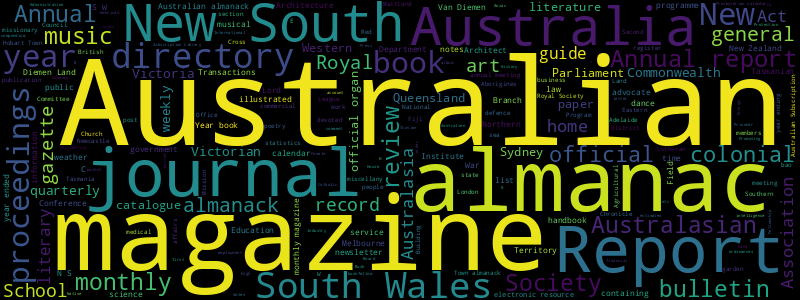

In [2]:
from wordcloud import WordCloud

wc = WordCloud()
wc = WordCloud(width=800, height=300).generate("\n".join(df_titles["title"].to_list())).to_image()
wc

In [7]:
glue("wc-titles", wc, display=False)

```{glue:figure} wc-titles
:name: wc-periodical-titles
Words in the titles of periodicals
```

## Issues

In [30]:
df_issues = pd.read_csv("https://github.com/GLAM-Workbench/trove-periodicals-data/raw/main/periodical-issues.csv", keep_default_na=False)

print(f"There are {df_issues.shape[0]:,} digitised periodical issues in Trove.")

There are 37,015 digitised periodical issues in Trove.


In [31]:
import altair as alt

df_issues["year"] = df_issues["date"].str.slice(0,4)

df_issues_years = df_issues["year"].value_counts().to_frame().reset_index()

# Add a link to the db of issues in Datasette
df_issues_years["db_link"] = df_issues_years["year"].apply(lambda x: f"https://glam-workbench.net/datasette-lite/?url=https://github.com/GLAM-Workbench/trove-periodicals-data/blob/main/periodicals.db&install=datasette-json-html&install=datasette-template-sql&metadata=https://github.com/GLAM-Workbench/trove-periodicals-data/blob/main/metadata.json#/periodicals/issues?date__lte={x}-12-31&date__gte={x}-01-01&_sort=date")

chart_issues_years = alt.Chart(df_issues_years.loc[df_issues_years["year"] > "1800"]).mark_bar(size=2).encode(
    x=alt.X("year:T", title="year of publication"),
    y=alt.Y("count:Q", title="number of issues"),
    tooltip=[alt.Tooltip("year:T", format="%Y"), alt.Tooltip("count:Q", title="issues")],
    href="db_link"
).properties(width=600, height=300, padding=20)

chart_issues_years

alt.Chart(...)

In [32]:
glue("chart-issues-years", chart_issues_years, display=False)

```{glue:figure} chart-issues-years
:name: chart-issues-years
Number of periodical issues by year
```

In [33]:
import altair as alt

df_pages_years = df_issues.groupby("year")["pages"].sum().to_frame().reset_index()

df_issues["year"] = df_issues["date"].str.slice(0,4)

df_issues_years = df_issues["year"].value_counts().to_frame().reset_index()

# Add a link to the db of issues in Datasette
df_issues_years["db_link"] = df_issues_years["year"].apply(lambda x: f"https://glam-workbench.net/datasette-lite/?url=https://github.com/GLAM-Workbench/trove-periodicals-data/blob/main/periodicals.db&install=datasette-json-html&install=datasette-template-sql&metadata=https://github.com/GLAM-Workbench/trove-periodicals-data/blob/main/metadata.json#/periodicals/issues?date__lte={x}-12-31&date__gte={x}-01-01&_sort=date")

chart_pages_years = alt.Chart(df_pages_years.loc[df_pages_years["year"] > "1800"]).mark_bar(size=2).encode(
    x=alt.X("year:T", title="year of publication"),
    y=alt.Y("pages:Q", title="number of pages"),
    tooltip=[alt.Tooltip("year:T", format="%Y"), alt.Tooltip("pages:Q", title="pages", format=",")]
).properties(width=600, height=300, padding=20)

chart_pages_years

alt.Chart(...)

In [34]:
glue("chart-pages-years", chart_pages_years, display=False)

```{glue:figure} chart-pages-years
:name: chart-pages-years
Number of periodical issues by year
```

In [ ]:
## Undated issues